<a href="https://colab.research.google.com/github/hyeong777/Python-Quest/blob/main/ex_06_ControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

### 윤곽선 검출


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so
/opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 113
CUDA SETUP: Loading binary /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so...


/opt/conda/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//10.88.0.1'

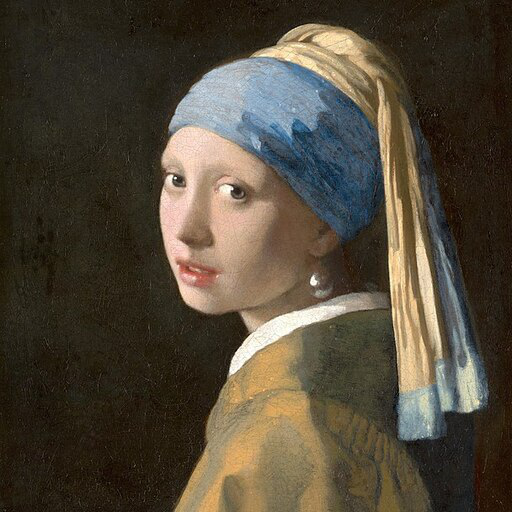

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

  0%|          | 0/20 [00:00<?, ?it/s]

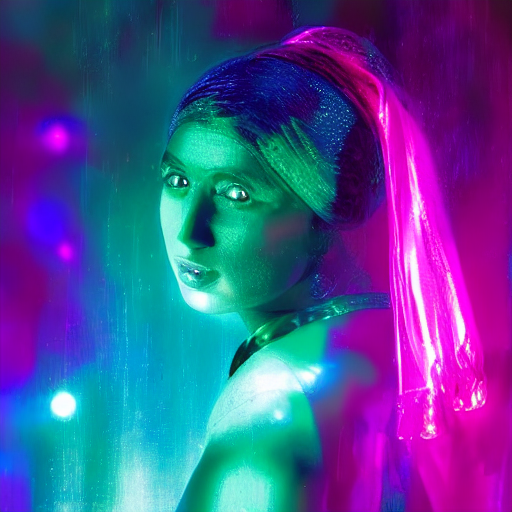

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
canny_image.save("/aiffel/aiffel/canny_image.png")

# 생성된 이미지를 출력합니다.
canny_image

-OpenCv 사용하여 이미지의 윤관선 검출

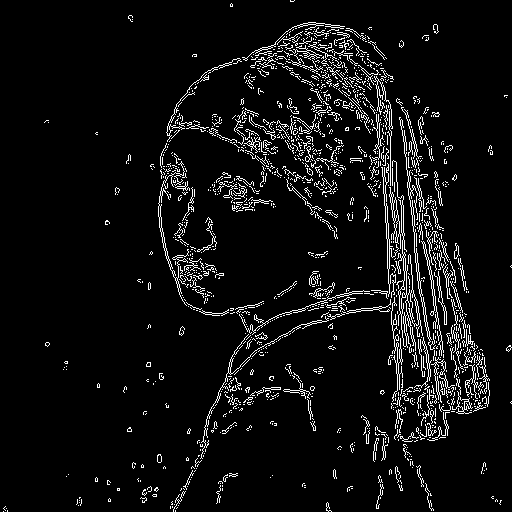

In [ ]:
import cv2
from PIL import Image
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image = np.array(image)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.

canny_image

In [ ]:
torch.cuda.empty_cache()

-윤곽선 검출 전처리기를 사용한 모델 파이프라인 불러오기

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/15 [00:00<?, ?it/s]

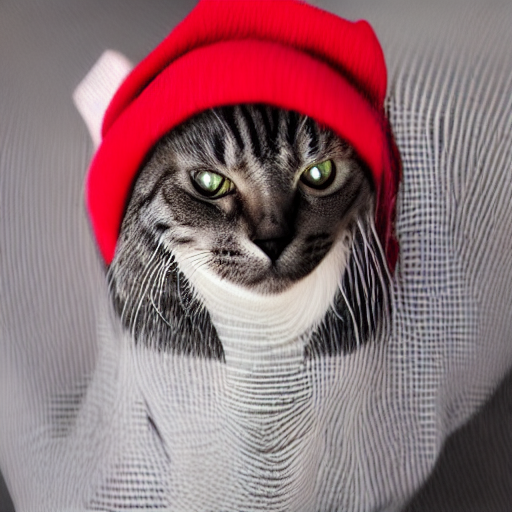

In [ ]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요.
# 프롬프트를 작성
prompt = "a cute cat wearing a hat"

# num_inference_steps 를 조절
num_inference_steps = 15

# generator 를 조절
generator = torch.manual_seed(1)

# 이미지를 생성
cute_cat_image = canny_pipe(
    prompt=prompt,
    num_inference_steps=num_inference_steps,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
cute_cat_image.save("/aiffel/aiffel/cute_cat_image.png")

# 생성된 이미지를 출력합니다.
cute_cat_image


-윤곽선을 추출한 이미지에 프롬프트를 적용하여 새로운 이미지 생성

  0%|          | 0/20 [00:00<?, ?it/s]

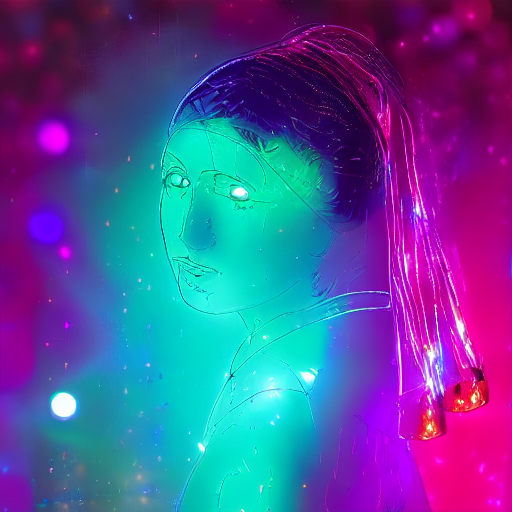

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
canny_image.save("/aiffel/aiffel/canny_image.png")

# 생성된 이미지를 출력합니다.
canny_image

###인체 자세 감지

In [ ]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

     |████████████████████████████████| 42 kB 1.4 MB/s             


-사람 전신 이미지 불러오기

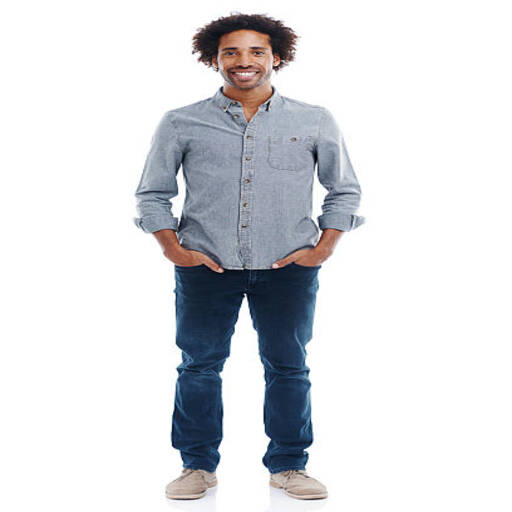

In [ ]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

-Openpose 검출기를 사용해서 자세만 추출

cuda


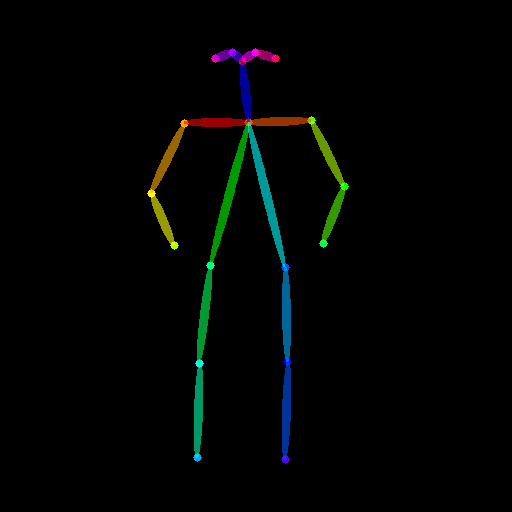

In [ ]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

-Openpose 전처리기를 사용한 모델 파이프 라인 불러오기

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

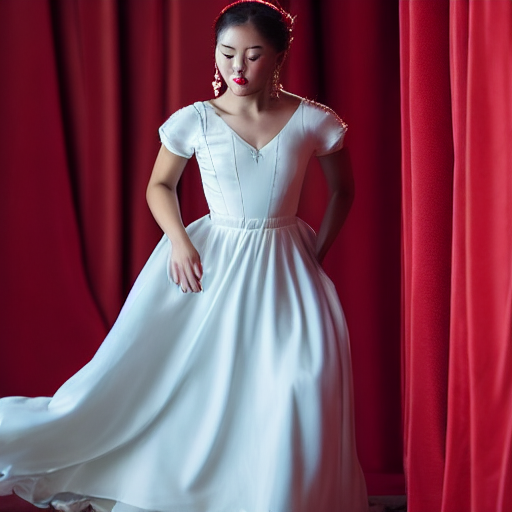

In [ ]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")


# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다.
generator = torch.manual_seed(0)

#프롬프트를 작성합니다.
prompt = "a woman in a red dress dancing ballet"
negative_prompt = "no man or animal"

images = openpose_image

# 이미지를 생성합니다.
openpose_image1 = openpose_pipe( prompt=prompt, negative_prompt=negative_prompt,
                                num_inference_steps=20, generator=generator, image=images ).images[0]

# 생성된 이미지를 출력합니다.
openpose_image1

In [ ]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요.
prompt = "a beautiful sunset over the ocean"
num_inference_steps = 10
generator = torch.manual_seed(2)

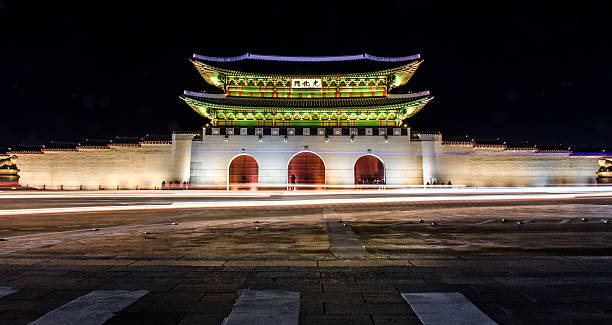

In [ ]:
import cv2
canny_image = load_image(
    "https://media.istockphoto.com/id/475884494/ko/%EC%82%AC%EC%A7%84/%EA%B4%91%ED%99%94%EB%AC%B8-%EC%95%BC%EA%B0%84%EC%97%90%EB%A7%8C.jpg?s=612x612&w=0&k=20&c=TCBfFBHDHkcbCi8NCnjmkKD4dIeugrnsoILddUr9O08="
)

canny_image

###윤곽선 검출 + 인체 자세 감지

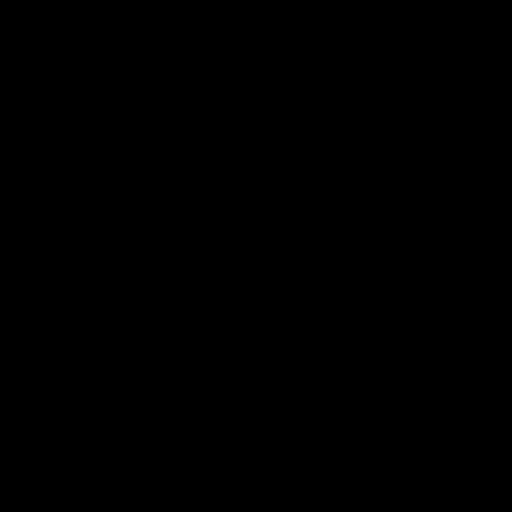

In [ ]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

#threshhold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 이미지를 불러오세요.
canny_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")
canny_image = canny_image.convert("RGB")


# 이미지를 NumPy 배열로 변환합니다.
canny_image = np.array(canny_image)
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

canny_image = Image.fromarray(canny_image)
canny_image = canny_image.resize((512,512))
canny_image

-OpenPose를 사용한 인체 자세 검출

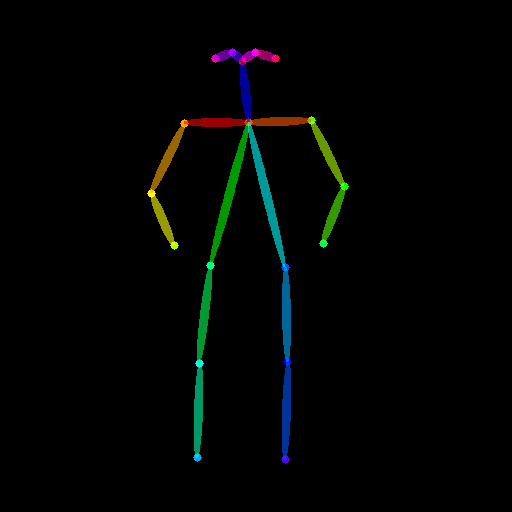

In [ ]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다.
openpose_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose_image = openpose(openpose_image)
openpose_image = openpose_image.resize((512,512))
openpose_image

-Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만들어 파이프라인으로 전달

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Token indices sequence length is longer than the specified maximum sequence length for this model (129 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ur of the metropolis in hyper - realistic 8 k resolution. the color scheme of electric blue, neon green, and deep purple adds an otherworldly ambiance to the composition, enhanced by the masterful use of neon - lit 3 d graphics and volumetric lighting.']


  0%|          | 0/25 [00:00<?, ?it/s]

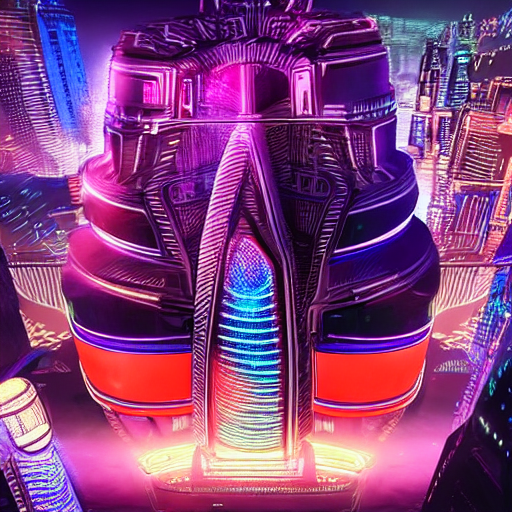

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다.
controlnets = [canny_controlnet, openpose_controlnet]

# 리스트 controlnets를 파이프라인으로 전달합니다.
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트를 작성합니다.
prompt =  "A futuristic cityscape with an elder figure seated atop a monumental building, deeply lost in thought. The city sprawls beneath, its intricate holographic architecture creating a mesmerizing spectacle. The neon lights cast a vibrant glow, reflecting off the elder's wise expression. The scene is a fusion of cyberpunk and surrealism, realized through a stunning digital painting with intricate 3D details, capturing the grandeur of the metropolis in hyper-realistic 8K resolution. The color scheme of electric blue, neon green, and deep purple adds an otherworldly ambiance to the composition, enhanced by the masterful use of neon-lit 3D graphics and volumetric lighting."


# seed를 지정합니다.
generator = torch.manual_seed(1)

images = [openpose_image, canny_image]

# 이미지를 생성합니다.
image = pipe(
    prompt,
    images,
    num_inference_steps=25,
    generator=generator
).images[0]

# 생성된 이미지를 저장합니다.
image.save("/aiffel/aiffel/multi_controlnet_output.png")

# 생성된 이미지를 출력합니다.
image

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_allocated()

10010638848